In [1]:
import pandas as pd
import seaborn as sns
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
adv03_list = []
for i, path in enumerate(glob('adv_epsilon_0.3/*')):
    df = pd.read_csv(path)
    df['agent_type'] = 'FGSM $\epsilon=0.3$'
    df['agent_name'] = 'agent_' + str(i)
    df = df.drop(['Unnamed: 0', 'jobnum'], axis=1)
    adv03_list.append(df)

adv05_list = []
for i, path in enumerate(glob('adv_epsilon_0.5/*')):
    df = pd.read_csv(path)
    df['agent_type'] = 'FGSM $\epsilon=0.5$'
    df['agent_name'] = 'agent_' + str(i)
    df = df.drop(['Unnamed: 0', 'jobnum'], axis=1)
    adv05_list.append(df)
    
adv07_list = []
for i, path in enumerate(glob('adv_epsilon_0.7/*')):
    df = pd.read_csv(path)
    df['agent_type'] = 'FGSM $\epsilon=0.7$'
    df['agent_name'] = 'agent_' + str(i)
    df = df.drop(['Unnamed: 0', 'jobnum'], axis=1)
    adv07_list.append(df)
    
base_list = []
for path in glob('base/*'):
    df = pd.read_csv(path)
    df['agent_type'] = 'Normal'
    df['agent_name'] = 'agent_' + str(i)
    df = df.drop(['Unnamed: 0', 'jobnum'], axis=1)
    base_list.append(df)

adv03_df = pd.concat(adv03_list)
adv05_df = pd.concat(adv05_list)
adv07_df = pd.concat(adv07_list)
base_df = pd.concat(base_list)
total_df = pd.concat([adv03_df, adv05_df, adv07_df, base_df])
total_df = total_df.rename({'episode': 'Episode', 'expected_return': 'Expected Return', 'agent_type': 'Agent Type'}, axis=1)

# for t in ['Normal', 'FGSM $\epsilon=0.3$', 'FGSM $\epsilon=0.5$', 'FGSM $\epsilon=0.7']:
#     for i in range(5):
#         total_df.append(pd.DataFrame({'Episode': 0, 'Expected Return': 0., 'Agent Type': t, 'agent_name': 'agent_'+str(i)}), ignore_index=True)


In [3]:
# total_df.set_index('episode', inplace=True)

In [4]:
total_df

,Episode,Expected Return,Agent Type,agent_name
0,100,0.208333,FGSM $\epsilon=0.3$,agent_0
1,200,0.298611,FGSM $\epsilon=0.3$,agent_0
2,300,0.368056,FGSM $\epsilon=0.3$,agent_0
3,400,0.541667,FGSM $\epsilon=0.3$,agent_0
4,500,0.562500,FGSM $\epsilon=0.3$,agent_0
...,...,...,...,...
15,1600,0.999998,Normal,agent_4
16,1700,0.999998,Normal,agent_4
17,1800,0.993054,Normal,agent_4
18,1900,0.999998,Normal,agent_4


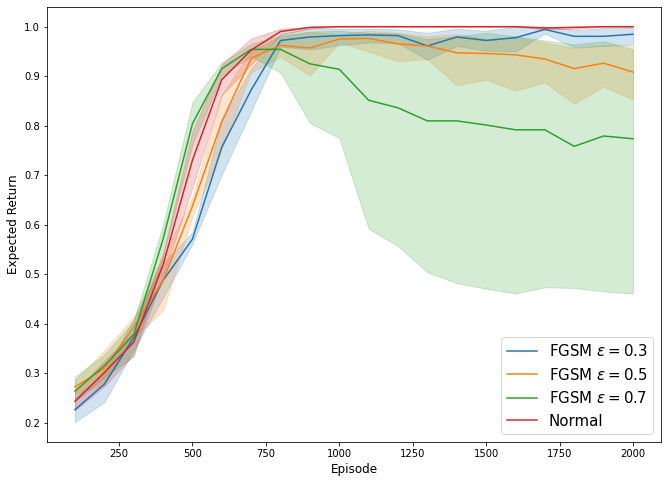

In [5]:
# Change font
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns_plot = sns.lineplot(x='Episode', y='Expected Return', hue='Agent Type', data=total_df.reset_index(drop=True))
plt.xlabel('Episode', fontsize=12)
plt.ylabel('Expected Return', fontsize=12)
plt.legend(fontsize=15)
sns_plot.figure.savefig('results.pdf')
# plt.close()

In [6]:
total_df.reset_index(drop=True)

,Episode,Expected Return,Agent Type,agent_name
0,100,0.208333,FGSM $\epsilon=0.3$,agent_0
1,200,0.298611,FGSM $\epsilon=0.3$,agent_0
2,300,0.368056,FGSM $\epsilon=0.3$,agent_0
3,400,0.541667,FGSM $\epsilon=0.3$,agent_0
4,500,0.562500,FGSM $\epsilon=0.3$,agent_0
...,...,...,...,...
395,1600,0.999998,Normal,agent_4
396,1700,0.999998,Normal,agent_4
397,1800,0.993054,Normal,agent_4
398,1900,0.999998,Normal,agent_4


In [7]:
total_df

,Episode,Expected Return,Agent Type,agent_name
0,100,0.208333,FGSM $\epsilon=0.3$,agent_0
1,200,0.298611,FGSM $\epsilon=0.3$,agent_0
2,300,0.368056,FGSM $\epsilon=0.3$,agent_0
3,400,0.541667,FGSM $\epsilon=0.3$,agent_0
4,500,0.562500,FGSM $\epsilon=0.3$,agent_0
...,...,...,...,...
15,1600,0.999998,Normal,agent_4
16,1700,0.999998,Normal,agent_4
17,1800,0.993054,Normal,agent_4
18,1900,0.999998,Normal,agent_4


## Optimal Policy Counts

In [8]:
total_df['Optimal Policy'] = total_df['Expected Return'] > 0.99

In [9]:
total_df

,Episode,Expected Return,Agent Type,agent_name,Optimal Policy
0,100,0.208333,FGSM $\epsilon=0.3$,agent_0,False
1,200,0.298611,FGSM $\epsilon=0.3$,agent_0,False
2,300,0.368056,FGSM $\epsilon=0.3$,agent_0,False
3,400,0.541667,FGSM $\epsilon=0.3$,agent_0,False
4,500,0.562500,FGSM $\epsilon=0.3$,agent_0,False
...,...,...,...,...,...
15,1600,0.999998,Normal,agent_4,True
16,1700,0.999998,Normal,agent_4,True
17,1800,0.993054,Normal,agent_4,True
18,1900,0.999998,Normal,agent_4,True


No handles with labels found to put in legend.


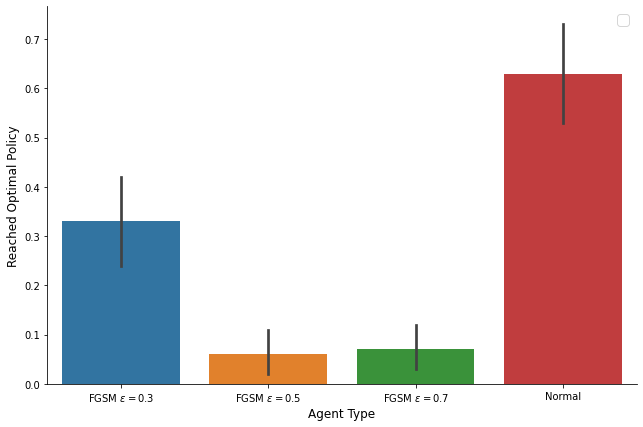

In [10]:
g = sns.catplot(data=total_df, kind='bar', x='Agent Type', y='Optimal Policy', height=6, aspect=1.5)
plt.xlabel('Agent Type', fontsize=12)
plt.ylabel('Reached Optimal Policy', fontsize=12)
plt.legend(fontsize=15)
g.figure.savefig('optimal_plot.pdf')

In [11]:
later_df = total_df[total_df['Episode'] > 1000]

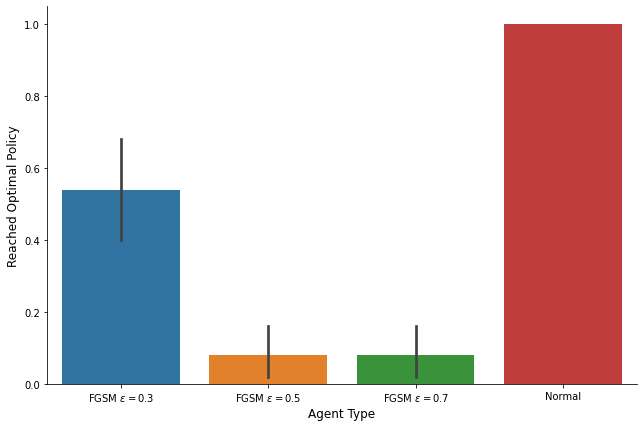

In [13]:
g = sns.catplot(data=later_df, kind='bar', x='Agent Type', y='Optimal Policy', height=6, aspect=1.5)
plt.xlabel('Agent Type', fontsize=12)
plt.ylabel('Reached Optimal Policy', fontsize=12)
# plt.title('Reached Optimal Policy After 1000 Episodes', fontsize=15)
# plt.legend(fontsize=12)
g.figure.savefig('later_optimal_plot.pdf')

In [24]:
total_df['Only Second Half of Training']total_df['Episode'] > 1000

No handles with labels found to put in legend.


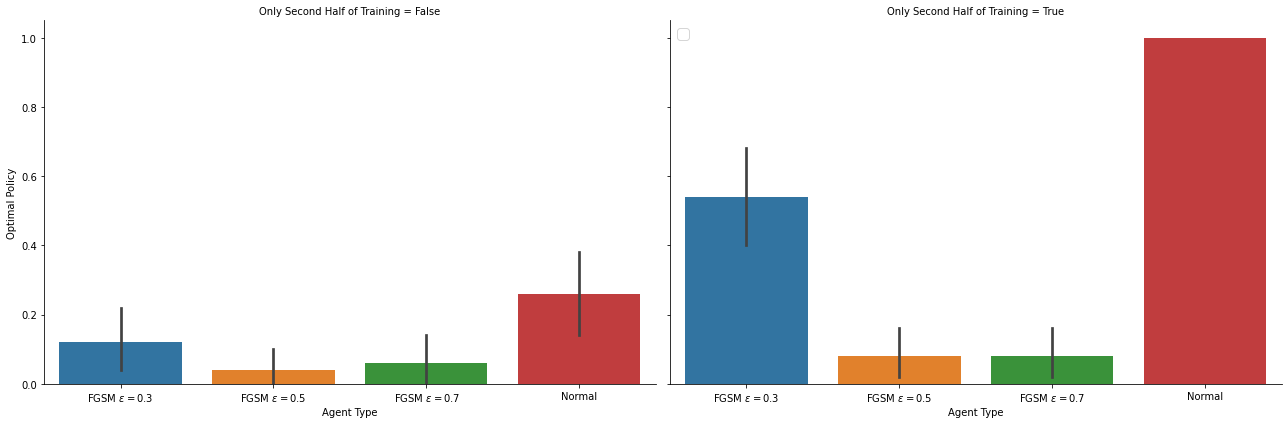

In [25]:
g = sns.catplot(data=total_df, kind='bar', x='Agent Type', y='Optimal Policy', col='Only Second Half of Training', height=6, aspect=1.5)
plt.xlabel('Agent Type')
plt.ylabel('Reached Optimal Policy')
plt.legend(fontsize=15)
g.figure.savefig('pair_plot.pdf')